# **Introduction to Machine Learning : Lab 02** 

This lab is designed to give you an insight into how to make an **autoencoder model to detect anomaly** in your dataset.


The dataset can be downloaded from the following [link](https://data.mendeley.com/datasets/fddp3dvvzr/1). 


**Autoencoder**

> An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.


To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.




# **1. Import the essential libraries**

For example:

import numpy as np

you should import the related libraries from Keras and Tensorflow in order to make your own **Model**

In [1]:
import numpy as np

import tensorflow as tf

print(tf.__version__)

from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, Conv2DTranspose, Input
from sklearn.model_selection import train_test_split

import pandas as pd

#your code

2.12.0


# **2. Load the dataset**



**Download the dataset (there is three .csv file) set and load it from your local drive.** 

*BarrelMovement.csv* contains parameter readings from barrel pick and place movement. Similarly, *SpringMovement_Converged.csv* and *SpringMovement_withTransientData.csv* contain parameter readings for spring pick and place movement. 


In [2]:
# reading the CSV file

csvFile = pd.read_csv('BarrelMovement.csv')
#csvFile = pd.read_csv('SpringMovement_Converged.csv')
#csvFile = pd.read_csv('SpringMovement_withTransientData.csv')
"""
p0 := Motor inertia
p1 := Gravity
p2 := Mass
p3 := Spring offset
p4 := Coulomb friction 0
p5 := Coulomb friction 1
p6 := Coulomb friction 2
p7 := Spring constant
p8 := Viscose friction 0
p9 := Viscose friction 1
p10 := Viscose friction 2
""";

column= ['p4','p5', 'p6', 'p8','p9', 'p10']
csvFile.dropna(axis = 0, how = 'any', inplace = True)

DeltaParameters_sm = pd.DataFrame(csvFile, columns=column)



In [3]:
# PreProcessing
# clean the dataset, there most be some NAN values in the Dataframe, you should try to remove them (Hint; you can use 'dropna' function from 'Dataframe Pandas')

DeltaParameters_sm.dropna()

DeltaParameters_sm

p4        p5        p6        p8        p9       p10
0    0.004947  0.003061  0.000405  0.000739  0.025763  0.018058
1    0.004916  0.003118  0.000379  0.000750  0.025755  0.018106
2    0.004900  0.003164  0.000380  0.000764  0.025801  0.018073
3    0.004960  0.003264  0.000374  0.000785  0.025850  0.018197
4    0.004960  0.003264  0.000374  0.000785  0.025906  0.018369
..        ...       ...       ...       ...       ...       ...
895  0.004795  0.003322  0.000441  0.000761  0.025903  0.019054
896  0.004795  0.003322  0.000441  0.000761  0.025962  0.018953
897  0.004785  0.003302  0.000421  0.000760  0.025918  0.018776
898  0.004749  0.003268  0.000421  0.000759  0.025806  0.018660
899  0.004763  0.003273  0.000412  0.000759  0.025749  0.018645

[900 rows x 6 columns]

# Normalization

After gathering datasets for different tasks of the delta robot, the first step is to normalize the data to remove the effects of scaling in the data. Data normalization can be calculated as follows

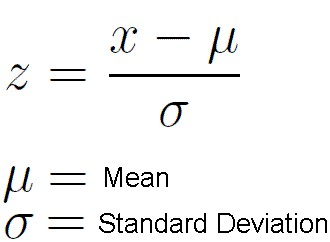



In [4]:
# Normalize the data


training_bm_mean = DeltaParameters_sm.mean()
print(training_bm_mean)

training_bm_std = DeltaParameters_sm.std()
print(training_bm_std)
df_training_bm_value = (DeltaParameters_sm - training_bm_mean) / training_bm_std

print("Number of training samples:", len(df_training_bm_value))


print(df_training_bm_value.describe())

print(df_training_bm_value.median())


p4     0.004894
p5     0.003076
p6     0.000402
p8     0.000759
p9     0.025845
p10    0.018498
dtype: float64
p4     0.000086
p5     0.000175
p6     0.000033
p8     0.000018
p9     0.000180
p10    0.000652
dtype: float64
Number of training samples: 900
                 p4            p5            p6            p8            p9  \
count  9.000000e+02  9.000000e+02  9.000000e+02  9.000000e+02  9.000000e+02   
mean  -2.059414e-14 -8.072802e-15 -1.421209e-15 -2.024946e-14 -1.158151e-13   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.644503e+00 -2.163254e+00 -2.845104e+00 -2.446315e+00 -2.367911e+00   
25%   -7.346681e-01 -7.810715e-01 -7.444299e-01 -8.455642e-01 -7.067932e-01   
50%    1.647813e-01 -1.153817e-01 -1.462682e-01 -5.643947e-02 -9.374478e-02   
75%    7.774868e-01  8.072150e-01  7.717174e-01  6.365509e-01  6.666271e-01   
max    1.931098e+00  2.390341e+00  2.705579e+00  3.060015e+00  3.052321e+00   

                p10  
count  9.000

# Data Visualization

Show the first 10 rows in the datset

In [5]:
# visualization

df_training_bm_value.head(5)


p4        p5        p6        p8        p9       p10
0  0.617287 -0.085540  0.065528 -1.073737 -0.456626 -0.675700
1  0.251995  0.241501 -0.720076 -0.474157 -0.497932 -0.600868
2  0.065657  0.505113 -0.677835  0.261248 -0.242496 -0.652087
3  0.767177  1.073228 -0.852088  1.397862  0.026930 -0.461651
4  0.767177  1.073228 -0.852088  1.397862  0.341058 -0.197593

# Split the test and Train data

In [6]:
# your code

X_train, X_test = train_test_split(df_training_bm_value, test_size=0.05, random_state=1,shuffle=True)

X_test

p4        p5        p6        p8        p9       p10
860 -0.979023 -0.998986 -0.924514 -0.273825 -1.829552  0.031685
880 -1.041942 -0.621455 -0.608007 -1.246937 -0.601313 -0.392240
874 -2.043878  0.520942  0.904583  0.106027  1.768925  0.572130
780  0.373331 -0.682880  1.124703 -2.446315 -0.418649  0.374974
525 -0.295618 -0.290177 -0.840878 -0.204359 -0.067222  0.326675
6    0.767177  1.073228 -0.852088  1.397862  0.893813  0.284903
685 -1.115823 -0.892142 -0.095944 -1.046441  0.908799  0.471517
195  0.589439  1.899839  1.889639  0.689916  0.689223  1.372068
651 -1.482885 -0.831580 -0.410790  0.478688 -0.035334 -1.292032
363  0.374650  0.703452 -0.284852  0.732522 -0.551184 -0.336713
17   0.902437  1.991248  0.865937  0.771531  1.215836  0.734290
223  1.557739  0.830504  1.289770 -0.485217 -1.119202  0.767671
835 -0.458819 -1.668092 -1.298220 -1.099398 -1.137438 -1.707042
748  0.276105  1.399533 -0.593111  1.005643 -0.501338  0.771534
600  0.150394 -0.217891  1.778990 -0.720036 -0.277168  0.446880
855 -1.623596 -1.204217  0.748942 -0.932355 -1.686476  0.202099
858 -0.960261 -1.539886 -0.887561 -1.009883 -2.172595  0.008311
736  0.043411  1.639550  1.521070 -0.146935  0.720489  1.862338
448  0.004301 -1.272009  0.652827 -0.927288 -0.641669 -1.357605
867 -1.226741 -0.565564 -0.576341  0.096602  1.344232  0.617205
3    0.767177  1.073228 -0.852088  1.397862  0.026930 -0.461651
801  0.375727 -0.822626 -1.419022 -0.058183 -0.773487 -0.670621
414  0.864310  0.343052  0.769821 -0.601210 -1.598392  0.725686
623 -0.501332 -1.053713  1.509226 -0.434221 -0.322924 -0.444128
594  0.446586  0.524893  0.227725 -0.600393 -1.853139  0.820255
408  1.621075  0.903144  0.165269 -0.527822 -1.042242  0.947279
433  1.678693 -0.115382 -0.342926  0.227741 -0.441819 -0.037942
446 -0.258904 -0.987217  0.999218 -0.049302 -0.255654 -1.226194
181  0.095195  0.211876 -0.542741 -0.356965 -0.791468 -0.566284
339 -0.505568 -0.886592 -0.261586 -0.999968 -0.113417 -0.625313
670 -1.678610 -0.608847  1.838273  0.130436 -0.665428  0.833239
309 -1.279972 -0.659057  2.297247  0.244903 -0.777555  0.632371
34   0.674060  1.612678 -0.055697 -0.350808  1.221881  1.569338
2    0.065657  0.505113 -0.677835  0.261248 -0.242496 -0.652087
631  1.002359 -1.736700 -0.648526 -1.140533 -1.609460 -1.619049
452  0.807989 -1.535444 -0.601118 -0.849923 -1.119297 -1.685655
148 -1.430696 -0.082828 -0.491828 -0.166167  1.650547  0.552221
733  0.277216  1.240629 -0.412301 -1.187061  1.415136  1.665162
798  0.339985 -0.328464 -1.059034  0.559485 -0.828795 -0.892949
382  1.545563  0.524973  1.220607 -1.134757 -1.086892  0.403411
608  1.429910 -0.946041  0.181495 -1.486496 -1.620451 -0.949694
428  1.753325 -0.851280  0.066223 -1.183247 -1.432885 -0.836396
13   0.476437  1.697994  0.110307 -0.123725  1.136208  1.375186
710 -0.709696  0.567914 -0.581598 -0.913123  1.714112  0.838707
886 -0.952124  0.075043 -1.211139 -0.132661 -0.340777  0.367329

In [7]:
print(X_train.shape)
#The input data has the following dimensions: (num. of samples, sequence length, num. of parameters, 1)
#X_train = np.array(X_train).reshape(-1, 11, 1)
#print(X_train.shape)
#X_test = np.array(X_test).reshape(-1, 11, 1)
#print(X_test.shape)

x_train = np.array(X_train).reshape(int(X_train.shape[0]), X_train.shape[1], 1)
print(f"x_train shape: {x_train.shape}")


(855, 6)
x_train shape: (855, 6, 1)


# **3. Build your Autoencoder Model**

create a function or class for Autoencoder model which contains an **Encoder** and a **Decoder** part. 

Based on the paper, you can create your initial Model as follows:

*Basic Structure consist of the following layers*


*   Convolution with 32 filters and kernel size of 4 × 4
*   Dropout
*   Convolution with 16 filters and kernel size of 12 × 12
*   Transpose (a.k.a. deconvolution) with 16 filters and kernel size of 12 × 12
*   Dropout
*   Transpose with 32 filters and kernel size of 4 × 4


In [8]:
from tensorflow.keras import layers
# The input data has the following dimensions: (num. of samples, num. of parameters, 1)
# As indicated in the paper, num. of parameters is 11, but only 6 parameters for friction (2 viscous and non-viscous for each Motor)

print(tf.__version__)

def AutoEncoder(X_train):
  model = keras.Sequential(
    [
        layers.Conv1D(
            filters=32, kernel_size=4, padding="same", activation="relu",input_shape=(x_train.shape[1], 1)
        ),
        Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=12, padding="same", activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=12, padding="same", activation="relu"
        ),
        Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=4, padding="same", activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=14, padding="same"),
    ]
  )
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
  model.summary()
  
  #your_code
  
  return model

2.12.0


In [9]:
# show a summary of your network
model = AutoEncoder(x_train)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             160       
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 16)             6160      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 6, 16)            3088      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 6, 16)             0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 6, 32)            2080      
 ranspose)                                              

# **4. Train your Network**

train your network and try to use different number for epoch and batch_size

In [10]:
# train the network
num_epochs = 20
batch_size = 10

history = model.fit(x_train, x_train,
                epochs=num_epochs,
                shuffle=True,
                validation_split=0.1)

Epoch 1/20
25/25 [==============================] - 8s 47ms/step - loss: 0.8499 - val_loss: 0.4322
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 0.2615 - val_loss: 0.0902
Epoch 3/20
25/25 [==============================] - 0s 13ms/step - loss: 0.1201 - val_loss: 0.0378
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 0.0875 - val_loss: 0.0207
Epoch 5/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0759 - val_loss: 0.0191
Epoch 6/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0710 - val_loss: 0.0164
Epoch 7/20
25/25 [==============================] - 0s 13ms/step - loss: 0.0679 - val_loss: 0.0135
Epoch 8/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0636 - val_loss: 0.0135
Epoch 9/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0680 - val_loss: 0.0099
Epoch 10/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0615 - val_loss: 0.0079
Epoch 11/

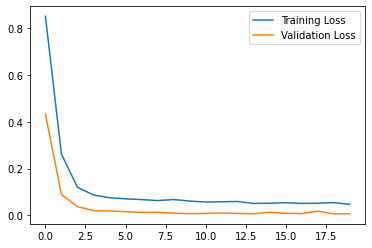

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# **5. Test the network**

For Testing , you should make a noise signal and add it to your data, then use the 'Predict' function to detect the anomaly in the data. 
As an example, create an impaired signal sequence of length 4 at 45, 85 and 110 indices. (see the example below)

(180, 6)
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.
 3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8]
(45, 6)


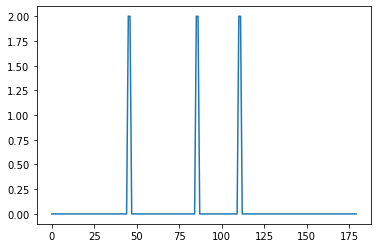

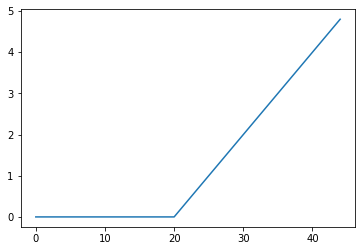

In [12]:
# Add a disturbance to your test dataset and create a new test dataset
import matplotlib.pyplot as plt

# your code
#  disturbance occur at distLoc (indices) 
x = np.linspace(0,179, 180)
distLoc = [45, 85,110]
NoiseLength = 2 # 4
Step1 = 2
def u(x, distLoc):
    unit_step = np.zeros(x.shape[0])
    i=0
    for i in range(0,3):
      #print(t[place])
      if x[distLoc[i]]:
        unit_step[distLoc[i]] = Step1
        for j in range(1,NoiseLength):
          unit_step[(distLoc[i]+j)] = Step1
    return unit_step  

yy= u(x, distLoc)
yy     

plt.plot(yy)
Noise= []
for i in range(0,6):
  Noise.append(yy)
Noise= np.array(Noise).T
print (Noise.shape)

########################################
## Add linear noise ##
linnoise = np.roll(0.2*np.linspace(0,44,45), 20)
linnoise[:20] = 0
print(linnoise)
plt.figure()
plt.plot(linnoise)

LinNoise= []
for i in range(0,6):
  LinNoise.append(linnoise)
LinNoise= np.array(LinNoise).T
print (LinNoise.shape)

########################################


In [13]:
# Add the disturbance to data
print(X_test.shape)
#x_noisy_test = X_test + Noise
########################################
x_noisy_test = X_test + LinNoise 
########################################


(45, 6)


In [14]:
# Reshape due be fit to the network input
x_test_noisy2 = np.array(x_noisy_test).reshape(int(x_noisy_test.shape[0]), x_noisy_test.shape[1], 1)
X_test2 = np.array(X_test).reshape(int(X_test.shape[0]), X_test.shape[1], 1)
print(f"x_test shape: {x_test_noisy2.shape}")

x_test shape: (45, 6, 1)


Root Mean Squared Error (RMSE)and Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. These metrics tell us how accurate our predictions are and, what is the amount of deviation from the actual values.

**Mean Absolute Error (MAE):** MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.



2/2 [==============================] - 0s 9ms/step
clean error [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MAE general [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]


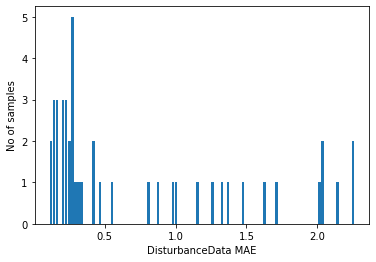

In [15]:
plt.figure()
predict = model.predict(X_test2)

predict2 = model.predict(x_test_noisy2)
test_Noise_mae = np.mean(np.linalg.norm(np.abs(x_test_noisy2 - predict2), axis=1), axis=1)
kk= tf.keras.activations.relu(np.array(test_Noise_mae))

kk2=np.zeros(kk.shape)
for i in range(kk.shape[0]):
  if kk[i]>1:
    kk2[i]=1
print('clean error', (kk2))

print('MAE general',np.round(test_Noise_mae))
plt.hist(test_Noise_mae, bins=100, histtype='bar', rwidth=0.8, label=['Test'])
#plt.hist([train_mae_loss_pnt_substrate_ok,test_mae_loss_pnt_substrate_ok], bins=100, histtype='bar', rwidth=0.8, label=['Train', 'Test'])
plt.xlabel("DisturbanceData MAE")
plt.ylabel("No of samples")
plt.show(block= True)

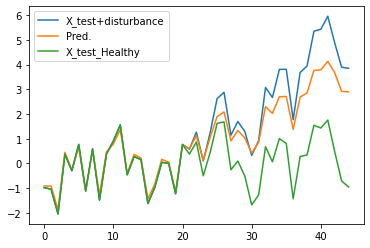

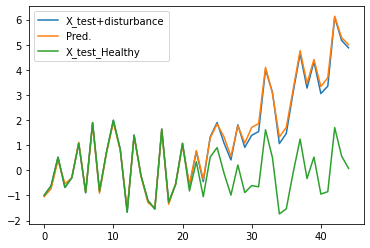

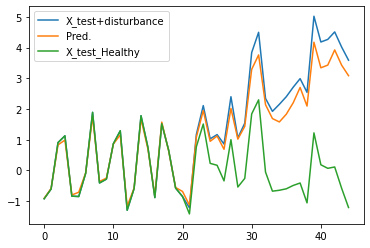

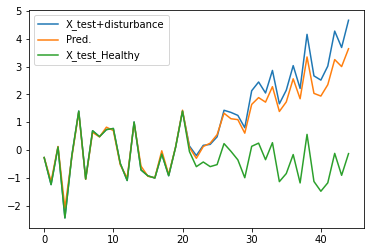

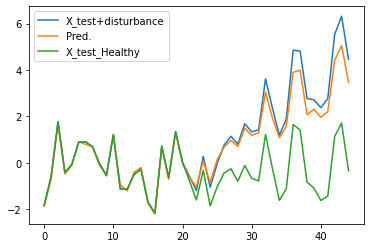

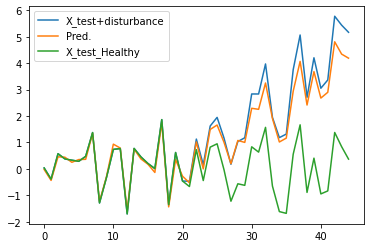

In [16]:
#predict = model.predict(x_test_noisy2)

for i in range(x_test_noisy2.shape[1]):
     plt.figure()
     plt.plot(x_test_noisy2[:200, i, 0])
     plt.plot(predict2[:200, i, 0])
     plt.plot(X_test2[:200, i, 0])
     plt.legend(["X_test+disturbance", "Pred.", "X_test_Healthy"])
     plt.show()

# **6. Sigmoid function**
Apply the Sigmoid function to the resulting MAE.
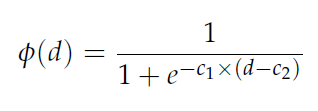
d is the reconstruction error(CI) which is difference between the original input data and the data reconstructed by the autoencoder. c1 is the slope of the sigmoid function and c2 determines the point where the sigmoid function is equal to 0.5.

--- Motor 1 Reconstruction Error:
4.726611886756173
--- Motor 2 Reconstruction Error:
4.848029882702313
--- Motor 3 Reconstruction Error:
4.789038321312428
--- All Motors Reconstruction Error:
4.787893363590304
---
0.9979087531933665
0.9983186136043428
0.9981306044271452
0.9981306044271452


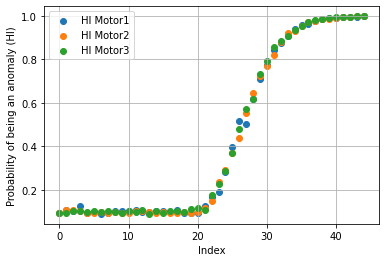

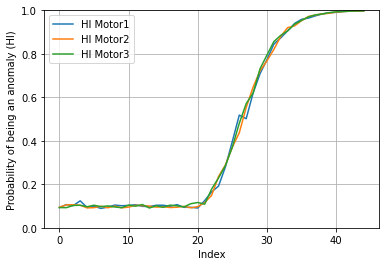

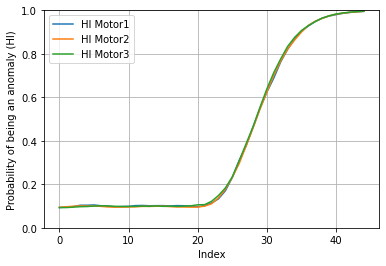

In [17]:
reconstruction_error_m1 = np.mean(np.abs(x_test_noisy2[:,[0,3]] - predict[:,[0,3]]), axis=1)
reconstruction_error_m2 = np.mean(np.abs(x_test_noisy2[:,[1,4]] - predict[:,[1,4]]), axis=1)
reconstruction_error_m3 = np.mean(np.abs(x_test_noisy2[:,[2,5]] - predict[:,[2,5]]), axis=1)
reconstruction_error_all = np.mean(np.abs(x_test_noisy2 - predict), axis=1)
print("--- Motor 1 Reconstruction Error:")
print(np.max(reconstruction_error_m1))
print("--- Motor 2 Reconstruction Error:")
print(np.max(reconstruction_error_m2))
print("--- Motor 3 Reconstruction Error:")
print(np.max(reconstruction_error_m3))
print("--- All Motors Reconstruction Error:")
print(np.max(reconstruction_error_all))
print("---")
#d = reconstruction_error
d1 = reconstruction_error_m1
d2 = reconstruction_error_m2
d3 = reconstruction_error_m3
d4 = reconstruction_error_all
c1 = 1.8
c2 = 1.3

#HIORG = 1/(1+ np.exp(-c1*(reconstruction_error-c2)))
#HI = HIORG[:]
#print(np.max(HI))

HIORG1 = 1/(1+ np.exp(-c1*(d1-c2)))
HI1 = HIORG1[:]
print(np.max(HI1))

HIORG2 = 1/(1+ np.exp(-c1*(d2-c2)))
HI2 = HIORG2[:]
print(np.max(HI2))

HIORG3 = 1/(1+ np.exp(-c1*(d3-c2)))
HI3 = HIORG3[:]
print(np.max(HI3))

HIORG_All = 1/(1+ np.exp(-c1*(d3-c2)))
HI_All = HIORG_All[:]
print(np.max(HI_All))

#plt.scatter(range(len(HI)), HI)
plt.scatter(range(len(HI1)), HI1)
plt.scatter(range(len(HI2)), HI2)
plt.scatter(range(len(HI3)), HI3)
#plt.scatter(range(len(d)), d)
plt.legend(["HI Motor1", "HI Motor2", "HI Motor3"])
#plt.scatter(range(len(reconstruction_error)), reconstruction_error)
plt.xlabel('Index')
plt.ylabel('Probability of being an anomaly (HI)')
plt.grid()
plt.show()

#plt.plot(range(len(HI)), HI)
plt.plot(range(len(HI1)), HI1)
plt.plot(range(len(HI2)), HI2)
plt.plot(range(len(HI3)), HI3)
plt.legend(["HI Motor1", "HI Motor2", "HI Motor3"])
plt.xlabel('Index')
plt.ylabel('Probability of being an anomaly (HI)')
plt.ylim(0, 1)
plt.grid()
plt.show()

def moving_average(data, window_size):
    pad = np.full(window_size - 1, data[0])
    padded_data = np.concatenate((pad, data))
    return np.convolve(padded_data, np.ones(window_size), 'valid') / window_size

# Choose a window size for the moving average
window_size = 5

# Reshape your data to 1D if necessary
HI1 = HIORG1.flatten()
HI2 = HIORG2.flatten()
HI3 = HIORG3.flatten()

# Apply the moving average to your data
HI1_smooth = moving_average(HI1, window_size)
HI2_smooth = moving_average(HI2, window_size)
HI3_smooth = moving_average(HI3, window_size)

# Plot the smoothed data
plt.plot(range(len(HI1_smooth)), HI1_smooth)
plt.plot(range(len(HI2_smooth)), HI2_smooth)
plt.plot(range(len(HI3_smooth)), HI3_smooth)
plt.legend(["HI Motor1", "HI Motor2", "HI Motor3"])
plt.xlabel('Index')
plt.ylabel('Probability of being an anomaly (HI)')
plt.ylim(0, 1)
plt.grid()
plt.show()


# **7. Gaussian-Process-Regressor**


C:\Users\dejol\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


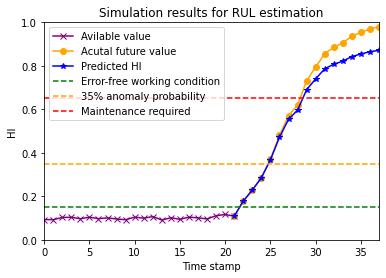

In [18]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor

kernel = ConstantKernel(constant_value=1.0) + RBF(length_scale=0.5)

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

toggle = 21

gaussian_process.fit(HI_All[:toggle], HI_All[:toggle])
HI_predict = gaussian_process.predict(HI_All[toggle:])

plt.plot(range(len(HI_All[:toggle+1])), HI_All[:toggle+1], '-x', color='purple', label='Avilable value')
plt.plot(range(toggle, toggle+len(HI_All[toggle:])), HI_All[toggle:],'-o', color='orange', label='Acutal future value')
plt.plot(range(toggle, toggle+len(HI_predict)), HI_predict, '-*', color='blue', label='Predicted HI')
plt.axhline(y=0.15, color='green', linestyle='--', label='Error-free working condition')
plt.axhline(y=0.35, color='orange', linestyle='--', label='35% anomaly probability')
plt.axhline(y=0.65, color='red', linestyle='--', label='Maintenance required')
plt.xlabel('Time stamp')
plt.ylabel('HI')
plt.title('Simulation results for RUL estimation')
plt.ylim(0, 1)
plt.xlim(0, 37)
plt.legend()
#plt.savefig('C:\\Users\\dejol\\Desktop\\3 Jahr\\Semester6\\PA FS23\\Ressourcen\\Plots\\GPR.png', dpi=300)
plt.show()

